In [51]:
import cv2
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim
import argparse
import imutils
from pystackreg import StackReg

In [52]:
im2 = cv2.imread('test11.png')
im1 = cv2.imread('test12.png')

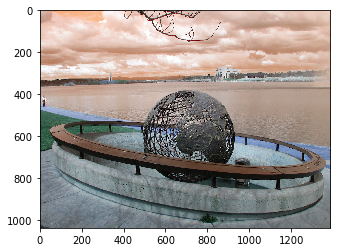

In [53]:
plt.imshow(im2)
plt.show()

In [43]:
# convert the images to grayscale
grayA = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [54]:
grayB = grayB[:,0:1386]  #To make shape equal

In [55]:
grayA.shape

(1038, 1386)

In [56]:
#This step is to align an image with reference to other image.
#Affine transformation
sr = StackReg(StackReg.AFFINE)
out_aff = sr.register_transform(grayA, grayB) 

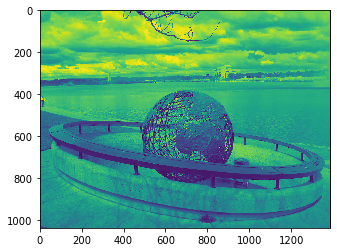

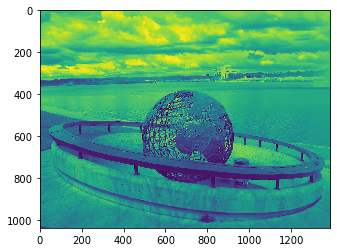

In [57]:
plt.imshow(out_aff)
plt.show()
plt.imshow(grayA)
plt.show()

In [58]:
#This step finds similarity score between images and segment the dissimilar parts
(score, diff) = compare_ssim(grayA, out_aff, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

C:\Users\myamamura2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


SSIM: 0.9775164621548927


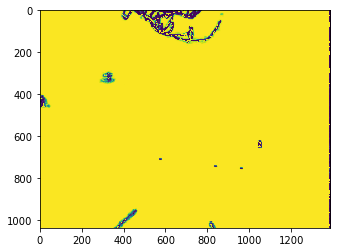

In [59]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
plt.imshow(diff)
plt.show()


In [60]:
len(cnts)

40

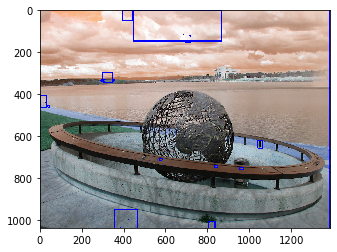

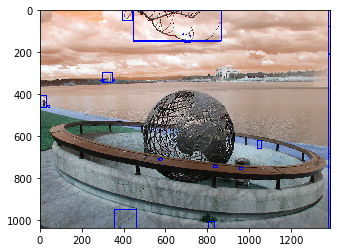

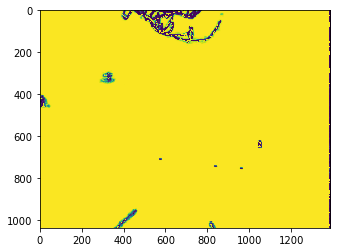

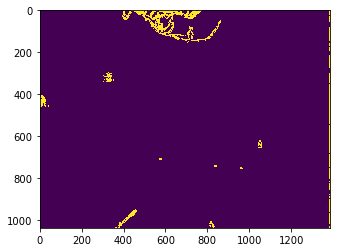

In [61]:
imageA=im1
imageB=im2
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 4)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 4)
 
# show the output images
plt.imshow(imageA)
plt.show()
plt.imshow(imageB)
plt.show()
plt.imshow(diff)
plt.show()
plt.imshow(thresh)
plt.show()

In [34]:
cv2.imwrite('img/result/test11.jpg', imageA)
cv2.imwrite('img/result/test12.jpg', imageB)
cv2.imwrite('img/result/diff.jpg', diff)
cv2.imwrite('img/result/thresh.jpg', thresh)


True